# <center> MNist database classification<br> <small>Réda DEHAK<br> 1 July 2020</small> </center>

The goal of this lab is :
    - Evaluate your understanding of the course
    - Try and make a comparison of different machine learning methods
    
This study is based on the <A href=http://yann.lecun.com/exdb/mnist/>MNist dataset</A>. It is handwritten digits dataset with a training set of 60000 samples, and a test set of 10000 samples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Questions:

- propose three different approaches to classify the MNist dataset. Compare the performance of each method and suggest solutions to improve the performance of each one. You can use all methods that you learned or not during the MSc. The goal is to obtain the best performances measure.
- Make a video of 5 minutes maximum to justify your choices and explain your results.
- Download the notebook and video on Teams before July 21th.

### Load the dataset
- MNist dataset is proposed in keras.datasets toolbox, you can use this code to load the dataset or use the function mnist_load_data provided in mnist.py file

In [3]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

#from mnist import mnist_load_data
#(Xtrain, ytrain), (Xtest, ytest) = mnist_load_data()
print('train: ', Xtrain.shape)
print('Test: ', Xtest.shape)

train:  (60000, 28, 28)
Test:  (10000, 28, 28)


## First Method:

....

> 98.517
> 98.700
> 98.575
> 98.825
> 98.517


C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

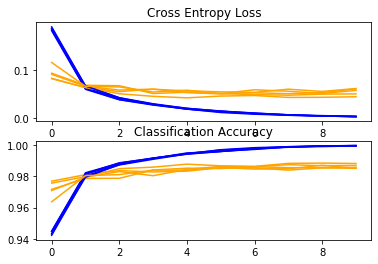

Accuracy: mean=98.627 std=0.120, n=5


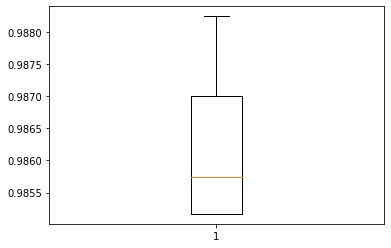

In [2]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))


trainY = to_categorical(trainY)
testY = to_categorical(testY)


def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm
trainX, testX = prep_pixels(trainX, testX)


def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model




def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
   
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

scores, histories = evaluate_model(trainX, trainY)

def summarize_diagnostics(histories):
    for i in range(len(histories)):
        
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()
 

def summarize_performance(scores):
    
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    
    pyplot.boxplot(scores)
    pyplot.show()
 

def run_test_harness():
    
    summarize_diagnostics(histories)
    
    summarize_performance(scores)
 

run_test_harness()

## Second Method:

....

In [10]:
from keras.datasets import mnist
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

(trainingImages, trainingLabels), (testImages, testLabels) = mnist.load_data()

trainingImages = trainingImages.reshape((len(trainingImages), -1))

testImages = testImages.reshape((len(testImages), -1))

In [11]:
#For linear Kernal

clf = svm.SVC(C=100, kernel='linear', decision_function_shape='ovr')

clf.fit(trainingImages[:30000], trainingLabels[:30000])

predictionRes = clf.predict(testImages)

# Calculation of the success of the test phase via metrics
print (metrics.classification_report(testLabels.tolist(), predictionRes, digits=4))

print(confusion_matrix(testLabels, predictionRes ))

              precision    recall  f1-score   support

           0     0.9521    0.9735    0.9627       980
           1     0.9539    0.9850    0.9692      1135
           2     0.8907    0.9079    0.8992      1032
           3     0.8617    0.8881    0.8747      1010
           4     0.9129    0.9501    0.9311       982
           5     0.8730    0.8554    0.8641       892
           6     0.9565    0.9415    0.9490       958
           7     0.9295    0.9105    0.9199      1028
           8     0.8910    0.8480    0.8690       974
           9     0.9156    0.8712    0.8928      1009

    accuracy                         0.9145     10000
   macro avg     0.9137    0.9131    0.9132     10000
weighted avg     0.9144    0.9145    0.9142     10000

[[ 954    0    1    2    2   13    6    1    1    0]
 [   0 1118    5    1    0    1    2    1    7    0]
 [   6   13  937   17    5    6    7   14   26    1]
 [   2    4   29  897    1   36    1    7   25    8]
 [   1    1   10    1  933   

In [12]:
#For Poly kernal
clf = svm.SVC(C=100, kernel='poly', degree = 2)

clf.fit(trainingImages[:30000], trainingLabels[:30000])

predictionRes = clf.predict(testImages)

# Calculation of the success of the test phase via metrics
print (metrics.classification_report(testLabels.tolist(), predictionRes, digits=4))
print(confusion_matrix(testLabels, predictionRes ))

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9851    0.9921    0.9886      1135
           2     0.9739    0.9777    0.9758      1032
           3     0.9744    0.9812    0.9778      1010
           4     0.9718    0.9817    0.9767       982
           5     0.9795    0.9641    0.9718       892
           6     0.9791    0.9770    0.9781       958
           7     0.9795    0.9737    0.9766      1028
           8     0.9782    0.9692    0.9737       974
           9     0.9770    0.9663    0.9716      1009

    accuracy                         0.9779     10000
   macro avg     0.9778    0.9776    0.9777     10000
weighted avg     0.9779    0.9779    0.9779     10000

[[ 973    0    1    1    0    0    2    0    3    0]
 [   0 1126    4    0    0    1    2    1    1    0]
 [   4    1 1009    0    1    0    4    9    4    0]
 [   0    0    4  991    1    2    0    5    5    2]
 [   2    0    1    0  964   

In [13]:
#For RBF kernal
clf = svm.SVC(C=100, kernel='rbf')
clf.fit(trainingImages[:30000], trainingLabels[:30000])

predictionRes = clf.predict(testImages)

# Calculation of the success of the test phase via metrics
print (metrics.classification_report(testLabels.tolist(), predictionRes, digits=4))

print(confusion_matrix(testLabels, predictionRes ))

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9877    0.9938    0.9908      1135
           2     0.9759    0.9797    0.9778      1032
           3     0.9746    0.9871    0.9808      1010
           4     0.9807    0.9807    0.9807       982
           5     0.9829    0.9686    0.9757       892
           6     0.9832    0.9781    0.9806       958
           7     0.9765    0.9718    0.9742      1028
           8     0.9794    0.9754    0.9774       974
           9     0.9770    0.9673    0.9721      1009

    accuracy                         0.9798     10000
   macro avg     0.9798    0.9795    0.9796     10000
weighted avg     0.9798    0.9798    0.9798     10000

[[ 973    0    1    0    0    1    2    1    2    0]
 [   0 1128    4    0    0    1    1    1    0    0]
 [   5    0 1011    0    1    0    2    9    4    0]
 [   0    0    2  997    1    2    0    4    3    1]
 [   1    0    3    0  963   

## Third Method:

....

In [1]:
from keras.datasets import mnist
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from io import StringIO
!pip install pydot
import  pydot


(trainingImages, trainingLabels), (testImages, testLabels) = mnist.load_data()


trainingImages = trainingImages.reshape((len(trainingImages), -1))

testImages = testImages.reshape((len(testImages), -1))
                                        
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784)

clf = clf.fit(trainingImages[:60000], trainingLabels[:60000])

predictionRes = clf.predict(testImages)

print (metrics.classification_report(testLabels.tolist(), predictionRes, digits=4))

Using TensorFlow backend.


              precision    recall  f1-score   support

           0     0.9161    0.9357    0.9258       980
           1     0.9489    0.9648    0.9567      1135
           2     0.8708    0.8556    0.8631      1032
           3     0.8433    0.8634    0.8532      1010
           4     0.8632    0.8870    0.8749       982
           5     0.8513    0.8408    0.8460       892
           6     0.8921    0.8800    0.8860       958
           7     0.9128    0.9066    0.9097      1028
           8     0.8310    0.8080    0.8194       974
           9     0.8612    0.8484    0.8547      1009

    accuracy                         0.8806     10000
   macro avg     0.8791    0.8790    0.8790     10000
weighted avg     0.8804    0.8806    0.8804     10000



## Comparison

....

In [ ]:
#for CNN, we got accuracy = 98.627
#In SVM - with LINEAR kernal, accuracy =0.9145
#       - with POLY kernal, accuracy =0.9779
#       - with RBF kernal, accuracy = 0.9798
# for decision tree , accuracy = 0.8806

## Conclusions and Perspectives:

...

In [ ]:
# As per the above results , CNN classifier gives the maximum efficiency when compared to SVM and Decision Tree.
# CNN results can be improved by increasing the learning rate.